In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [10]:
# Set plot style
sns.set_style("whitegrid")

# Define dataset path
dataset_path = '../input/fruits/fruits-360_100x100/fruits-360/Training'

# Get class names
class_names = sorted(os.listdir(dataset_path))
num_classes = len(class_names)

In [11]:
print(f"Total Classes: {num_classes}")
print(f"Sample Classes: {class_names[:10]}")

Total Classes: 176
Sample Classes: ['Apple 10', 'Apple 11', 'Apple 12', 'Apple 13', 'Apple 14', 'Apple 17', 'Apple 18', 'Apple 19', 'Apple 5', 'Apple 6']


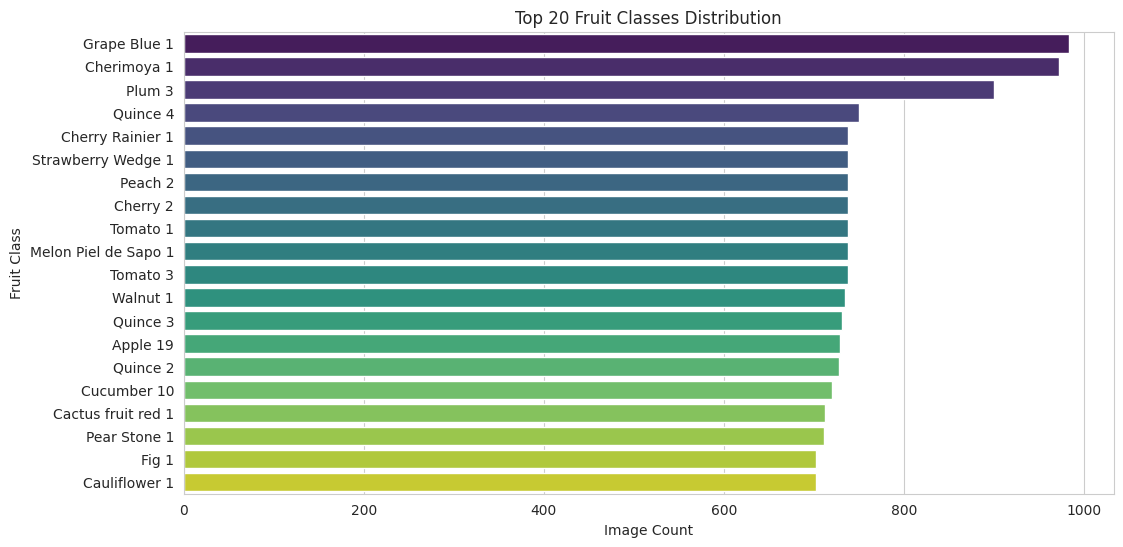

In [12]:
# Count images per class
class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in class_names}
class_counts_df = pd.DataFrame(list(class_counts.items()), columns=["Fruit", "Count"]).sort_values(by="Count", ascending=False)

# Plot class distribution
plt.figure(figsize=(12, 6))
sns.barplot(y=class_counts_df.Fruit[:20], x=class_counts_df.Count[:20], palette="viridis")
plt.xlabel("Image Count")
plt.ylabel("Fruit Class")
plt.title("Top 20 Fruit Classes Distribution")
plt.show()

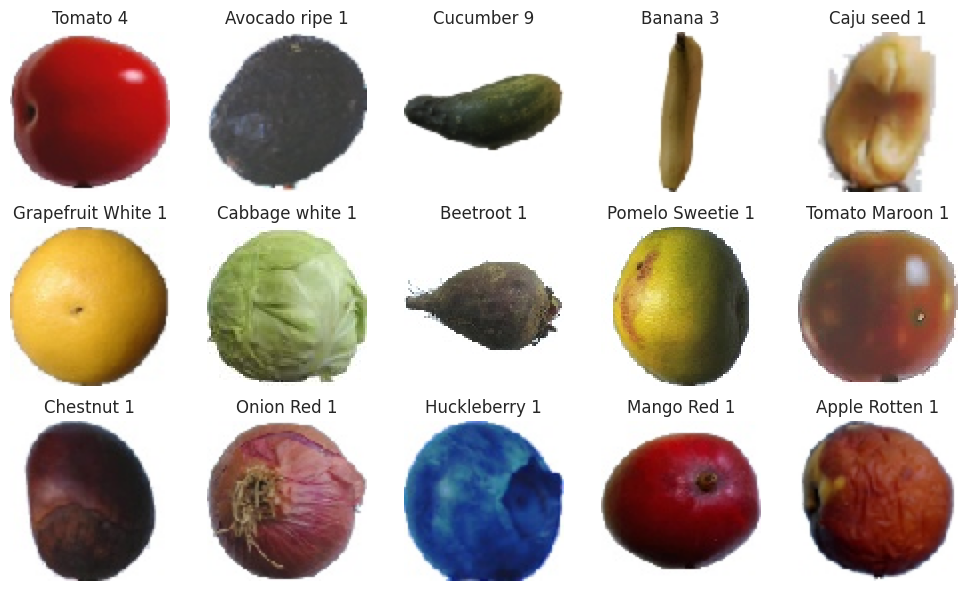

In [26]:
# Display sample images
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for ax, fruit in zip(axes.flatten(), np.random.choice(class_names, 15, replace=False)):
    fruit_path = os.path.join(dataset_path, fruit, np.random.choice(os.listdir(os.path.join(dataset_path, fruit))))
    img = load_img(fruit_path, target_size=(80, 80))
    ax.imshow(img)
    ax.set_title(fruit)
    ax.axis("off")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


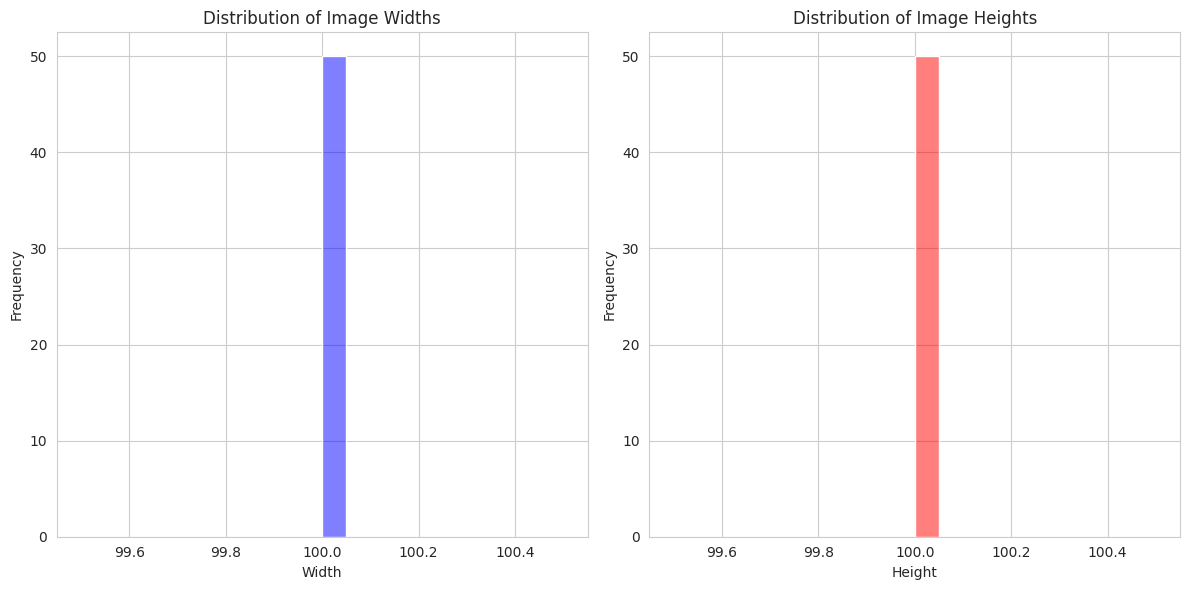

In [34]:
# Analyze image properties
image_sizes = []
aspect_ratios = []
widths = []
heights = []

for cls in class_names[:50]:
    img_path = os.path.join(dataset_path, cls, os.listdir(os.path.join(dataset_path, cls))[0])
    img = cv2.imread(img_path)
    h, w, _ = img.shape
    widths.append(w)
    heights.append(h)
    image_sizes.append((h, w))
    aspect_ratios.append(w / h)

sizes_df = pd.DataFrame(image_sizes, columns=["Height", "Width"])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(widths, bins=20, kde=True, color="blue")
plt.xlabel("Width")
plt.ylabel("Frequency")
plt.title("Distribution of Image Widths")

plt.subplot(1, 2, 2)
sns.histplot(heights, bins=20, kde=True, color="red")
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.title("Distribution of Image Heights")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


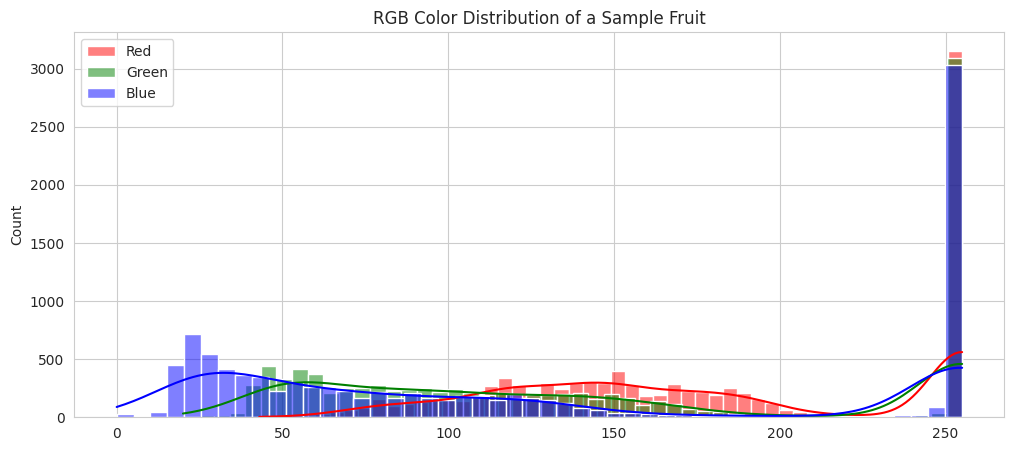

In [32]:
# Color distribution analysis
sample_fruit = os.path.join(dataset_path, class_names[0], os.listdir(os.path.join(dataset_path, class_names[0]))[0])
img = cv2.imread(sample_fruit)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

r, g, b = img_rgb[:, :, 0], img_rgb[:, :, 1], img_rgb[:, :, 2]
plt.figure(figsize=(12, 5))
sns.histplot(r.flatten(), color="red", bins=50, label="Red", kde=True)
sns.histplot(g.flatten(), color="green", bins=50, label="Green", kde=True)
sns.histplot(b.flatten(), color="blue", bins=50, label="Blue", kde=True)
plt.legend()
plt.title("RGB Color Distribution of a Sample Fruit")
plt.show()

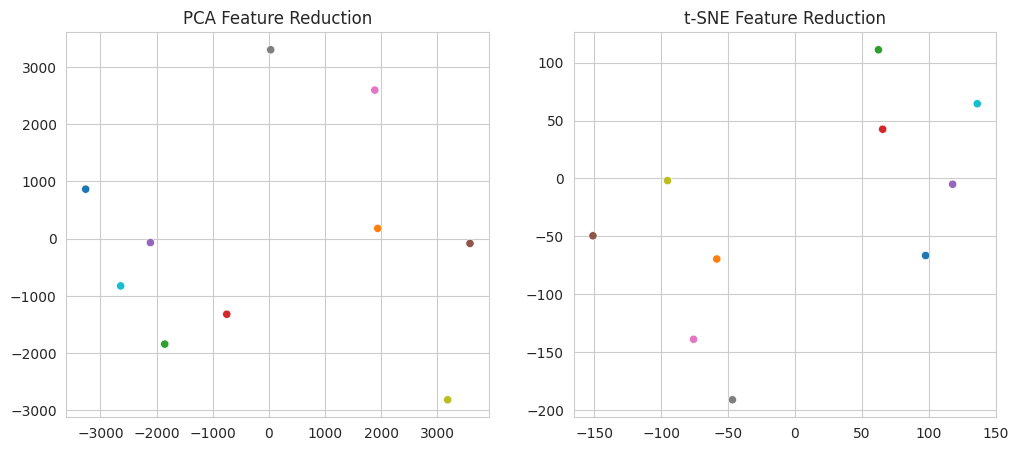

In [33]:
# Feature Extraction using PCA & t-SNE
sample_images = []
sample_labels = []

for cls in class_names[:10]:
    img_path = os.path.join(dataset_path, cls, os.listdir(os.path.join(dataset_path, cls))[0])
    img = load_img(img_path, target_size=(50, 50))
    img_array = img_to_array(img).flatten()
    sample_images.append(img_array)
    sample_labels.append(cls)

sample_images = np.array(sample_images)
pca = PCA(n_components=2).fit_transform(sample_images)
tsne = TSNE(n_components=2, perplexity=5, random_state=42).fit_transform(sample_images)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca[:, 0], y=pca[:, 1], hue=sample_labels, palette="tab10", legend=False)
plt.title("PCA Feature Reduction")

plt.subplot(1, 2, 2)
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=sample_labels, palette="tab10", legend=False)
plt.title("t-SNE Feature Reduction")

plt.show()